In [1]:
import pandas as pd
import math
import numpy as np
import warnings
import matplotlib.pyplot as plt
from IPython.display import display

warnings.simplefilter(action='ignore', category=Warning)

In [2]:
target_name='default12'
time_name='period'
id_row='aid'

In [3]:
df = pd.read_sas('abt_app.sas7bdat', encoding='LATIN2')

print(f'shape {df.shape}')

display(df.drop('row_id', axis = 1).head(1))

shape (33762, 224)


,app_IGJM,cid,aid,product,period,act_age,act_cc,act_loaninc,app_income,app_loan_amount,...,default12,default_cross3,default_cross6,default_cross9,default_cross12,cross_app_loan_amount,cross_app_n_installments,outstanding,credit_limit,outstanding_bad
0,Female-Permanent-Maried,0000001330,css1975010100098,css,197501,45.0,0.326905,1.530456,3267.0,5000.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,5000.0,5000.0


,product,size
0,css,11437
1,ins,22325


,product,default12
0,css,0.490417
1,ins,0.137648


,period,aid,default12
0,197501,221,0.321951
1,197502,193,0.301075
2,197503,219,0.318841
3,197504,195,0.303665
4,197505,212,0.303922
...,...,...,...
151,198708,212,0.202970
152,198709,237,0.198238
153,198710,217,0.217391
154,198711,199,0.216495


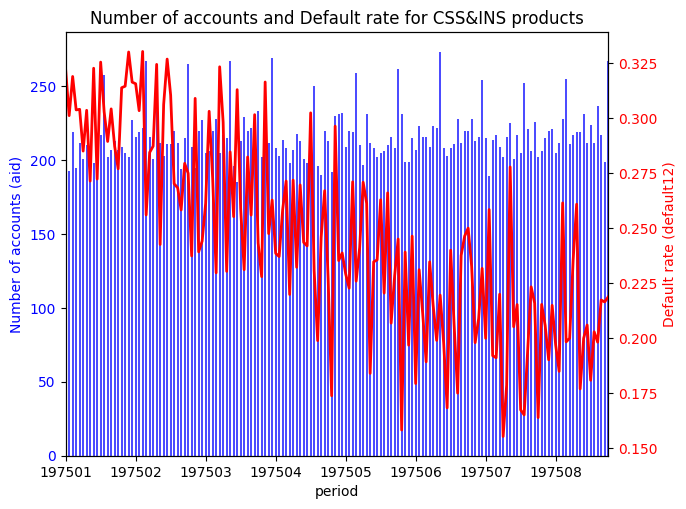

In [4]:
display(df.groupby('product', as_index=False, dropna=False).size())

display(df.groupby('product', as_index=False, dropna=False)[target_name].mean())

df_time = df.groupby(time_name, as_index=False, dropna=False).agg({id_row:'size', target_name:'mean'}).sort_values(time_name)

display(df_time)

x = np.arange(0, df_time.shape[0]) 
bar_values = df_time[id_row]
line_values = df_time[target_name]
x_labels = df_time[time_name].values

fig, ax1 = plt.subplots(figsize=(7, 5.5))

ax1.bar(x, bar_values, color='blue', width=0.6, alpha=0.7)
ax1.set_xlabel('period')
ax1.set_ylabel(f'Number of accounts ({id_row})', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(x_labels)

ax2 = ax1.twinx()
ax2.plot(x, line_values, color='red', linewidth=2)
ax2.set_ylabel(f'Default rate ({target_name})', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Number of accounts and Default rate for CSS&INS products')
plt.xlim(x.min(), x.max())
plt.show()